This notebook was created with the intention that it be merged with the 'Plotting Tephigrams with SHARPpy notebook'. It enables a user to select a station from a map. At the moment selecting a station displays the details of that station - name, code, latitude, longitude and elevation. When it is merged with the other notebook, it was inteded to allow a tephigram to be plotted from the selected station. 

The notebook requires the file station_ids.txt

The interactivity in this notebook does not currently work in a python 2 environment (the reason it is not merged with the SHARPPy notebook which requires python 2). 

<IPython.core.display.Javascript object>


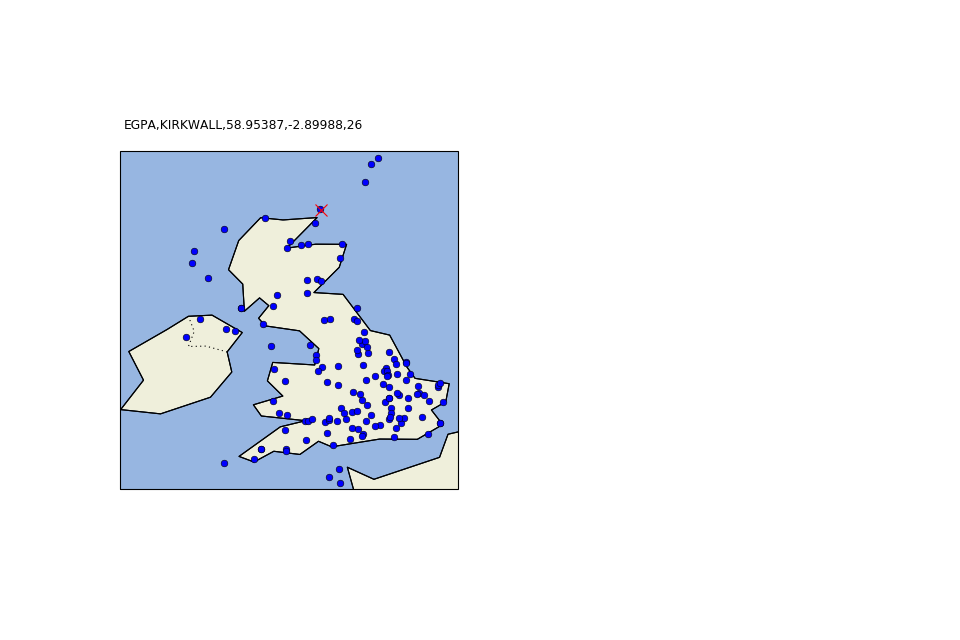

In [2]:

# This is a magic keyword that sets up how the notebook handles plots.
%matplotlib notebook

# Import all required python modules:

import numpy as np                             # For calculations


import matplotlib                              # For plotting
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import matplotlib.transforms as transforms
import cartopy
import cartopy.crs as ccrs

# First get the information about the stations that are available

station_file = open('station_ids.txt', 'r')
lines = station_file.readlines()
stationIDs=[]
station_name=[]
station_lat=[]
station_lon=[]

lines = lines[1::]
for x in lines:
    stationIDs.append(x.split(',')[0])    # ICAO codes of each station
    station_name.append(x.split(',')[1])  # Names of each station
    station_lat.append(x.split(',')[2])   # Latitude of each station
    station_lon.append(x.split(',')[3])   # Longitude of each station


def get_station_index(lat,lon):
    possible_lat_indices=[]
    possible_indices=[]
    for i in range(0, len(station_lat)):
        if float(station_lat[i])>lat-0.1 and float(station_lat[i])<lat+0.1:
            possible_lat_indices.append(i)
    for i in possible_lat_indices:
        if float(station_lon[i])>lon-0.1 and float(station_lon[i])<lon+0.1:
            possible_indices.append(i)

    return possible_indices




# Plot all station locations on a map of the UK.

plt.close('all')

fig =plt.figure(figsize=(12,8))

# Location
ax = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.set_extent([-10, 2, 49, 61])
plt.plot(station_lon, station_lat, 'o')


# Set up the interactivity

def on_event(event):
    #plt.axes(ax[1])
    lon_choice = event.xdata
    lat_choice = event.ydata

    
    # Plot location
    plt.clf()
    ax = fig.add_subplot(121, projection=ccrs.PlateCarree())
    ax.set_extent([-10, 2, 49, 61])
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    fig.canvas.draw()
    fig.canvas.draw_idle()
    ax.coastlines()
    
    plt.plot(station_lon, station_lat, 'o')
    plt.plot(lon_choice, lat_choice, 'xr', ms=10, mew=1)
    
    station_index=get_station_index(event.ydata,event.xdata)
    #station_string=lines[station_index[0]]
    if station_index==[]:
        ax.text(0.01,1.02, 'No station selected, try again', transform=ax.transAxes, fontsize=11)
    else:
        ax.text(0.01,1.02, str(lines[station_index[0]]), transform=ax.transAxes, fontsize=11)
    


    
    
fig.canvas.mpl_connect('button_press_event', on_event)
plt.show()